In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
# import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# import umap
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib as mpl

# Load File

In [11]:
import os

folder_path = "data/manual_eval/reports_txt"

# Get sorted list of filenames
file_list = sorted([f for f in os.listdir(folder_path) if f.endswith(".txt")])

# Load each file's text into a list
documents = []
for filename in file_list:
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
        documents.append(text)

# Optional: print a preview
for i, doc in enumerate(documents[:3]):
    print(f"Document {i+1} preview:\n{doc[:100]}...\n")

file_list
documents
print(documents[0][:500])

Document 1 preview:
Results
Distinct Cell Type Compositions Characterize Moderate and Critical COVID-19 Patients
To inve...

Document 2 preview:
RESULTS
Our single‐cell transcriptomic and cell–cell communication analyses of nasopharyngeal (NS) a...

Document 3 preview:
Results
Cell Type Distribution Differs Between Moderate and Critical COVID-19 Patients
We analyzed s...

Results
Distinct Cell Type Compositions Characterize Moderate and Critical COVID-19 Patients
To investigate how COVID-19 severity correlates with immune-epithelial dynamics, we analyzed single-cell RNA sequencing data from 27 patients (14 moderate and 13 critical cases) derived from the Chua et al. dataset . A total of 132,618 cells spanning 13 annotated cell types were included following subsetting for moderate and critical severity.
We first examined the cellular composition of individual samp


# Bag of words 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Initializes a CountVectorizer object - will learn a vocabulary from text and convert document(s)
# into a vector of word counts
BoW_vectorizer = CountVectorizer()
# Builds vocabulary of all unique words found across document(s)
# Converts document(s) into sparse vector indicating how many times each word
# from the vocabulary appears
BoW_X = BoW_vectorizer.fit_transform(documents)

features = BoW_vectorizer.get_feature_names_out()  # List of words in vocabulary
#print(BoW_X.toarray()[0:5])

In [13]:
print(features[1000:1100])
BoW_X.shape

['patient' 'patients' 'pattern' 'patterns' 'per' 'performance' 'performed'
 'period' 'perturbation' 'phase' 'phases' 'phenomena' 'phenotypes'
 'pipeline' 'pivotal' 'placed' 'placeholder' 'plasticity' 'platforms'
 'play' 'plays' 'plots' 'pmid' 'point' 'pointing' 'points' 'population'
 'populations' 'positive' 'positives' 'possibility' 'possible' 'post'
 'postsynapse' 'potential' 'potentially' 'pr' 'precise' 'precision'
 'predict' 'predicted' 'predicting' 'prediction' 'predictions'
 'predictive' 'predicts' 'predominant' 'predominate' 'presence' 'present'
 'presentation' 'previous' 'previously' 'primarily' 'principal'
 'priorities' 'pro' 'probabilities' 'probability' 'process' 'processes'
 'profile' 'profiled' 'profiles' 'profiling' 'progenitor' 'progesterone'
 'program' 'programmed' 'programs' 'progresses' 'progression'
 'progressive' 'progressively' 'proinflammatory' 'projection'
 'proliferation' 'proliferative' 'prominence' 'prominent' 'prominently'
 'promote' 'pronounced' 'proper' 'pr

(12, 1462)

# PCA

In [14]:
# Standardizing reduces explained variance in first components
# scaler = StandardScaler(with_mean=False)
# BoW_X = scaler.fit_transform(X)
BoW_X = BoW_X.toarray()
BoW_pca = PCA(n_components=2)
BoW_pca.fit(BoW_X)
BoW_pca_X = BoW_pca.transform(BoW_X)

print(BoW_pca.explained_variance_ratio_)
print(BoW_pca.singular_values_)
print(sum(BoW_pca.explained_variance_ratio_))

[0.31406371 0.27514672]
[69.1403634  64.71499899]
0.5892104227269044


In [15]:
BoW_X.shape
BoW_pca = PCA(n_components=2)

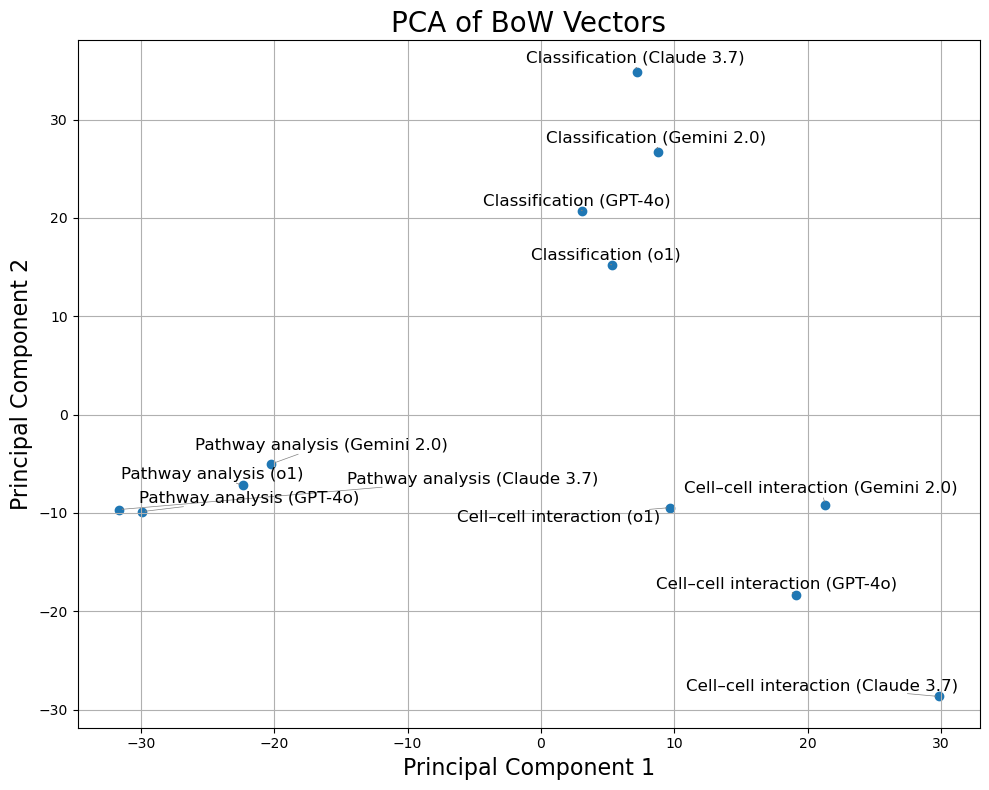

In [ ]:


# 1) Keep text as text in SVG; embed TrueType in PDF
mpl.rcParams['svg.fonttype'] = 'none'   # SVG: do NOT convert text to paths
mpl.rcParams['pdf.fonttype'] = 42       # PDF: use Type 42 (TrueType), not Type 3
mpl.rcParams['ps.fonttype']  = 42




x = BoW_pca_X[:, 0]
y = BoW_pca_X[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(x, y)

# Add each filename as a label
#for i, filename in enumerate(file_list):
#    plt.text(x[i], y[i], filename, fontsize=13, ha='right', va='bottom')


rename_models = {
    "gemini": "Gemini 2.0",
    "claude": "Claude 3.7",
    "chatgpt4o": "GPT-4o",
    "chatgpto1": "o1"
}

rename_tasks = {
    "Classification": "Classification",
    "CCI": "Cell–cell interaction",
    "Pathway": "Pathway analysis"
}

new_labels = []
for filename in file_list:
    base = filename.replace(".txt", "")
    task, model = base.split("_")
    task_label = rename_tasks.get(task, task)
    model_label = rename_models.get(model, model)
    new_labels.append(f"{task_label} ({model_label})")

 
    
texts = []
for i, label in enumerate(new_labels):
    texts.append(plt.text(x[i], y[i], label, fontsize=12, ha='right', va='bottom'))

# Automatically adjust positions to avoid overlap
adjust_text(texts, x=x, y=y, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))



plt.title("PCA of BoW Vectors", fontsize=20)
plt.xlabel("Principal Component 1", fontsize=16)
plt.ylabel("Principal Component 2", fontsize=16)
plt.grid(True)
plt.tight_layout()


plt.savefig("SuppFigure7.pdf", format="pdf")

plt.show()